In [1]:
from pathlib import Path
home = str(Path.home())
import sys
sys.path.append('{}/prog/msm/lib'.format(home))

In [2]:
import numpy as np
from simlib import *
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.set_cmap('rainbow')
import pyemma

<Figure size 432x288 with 0 Axes>

In [3]:
gaussians = []
m = 8
dm = 1.5
s3_2 = np.sqrt(3)/2*m

# Group 1
gaussians.append(gaussian(A=np.ones(2),
                          M=np.array([-m/2,+dm]),
                          S=np.ones(2)))
gaussians.append(gaussian(A=np.ones(2),
                          M=np.array([-m/2,-dm]),
                          S=np.ones(2)))

# group 2
gaussians.append(gaussian(A=np.ones(2),
                          M=np.array([m/2,+dm]),
                          S=np.ones(2)))
gaussians.append(gaussian(A=np.ones(2),
                          M=np.array([m/2,-dm]),
                          S=np.ones(2)))

# group 3
gaussians.append(gaussian(A=np.ones(2),
                          M=np.array([+dm, s3_2]),
                          S=np.ones(2)))
gaussians.append(gaussian(A=np.ones(2),
                          M=np.array([-dm,s3_2]),
                          S=np.ones(2)))

/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/__init__.py:130: UserWarning: You are not using the latest release of PyEMMA. Latest is 2.5.5, you have 2.5.4.
  .format(latest=latest, current=current), category=UserWarning)


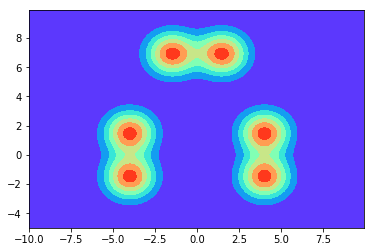

In [4]:
x = np.arange(-10, 10, 0.1)
y = np.arange(-5, 10, 0.1)
xx, yy = np.meshgrid(x, y, sparse=True)
z = np.sum(g.get_value([xx, yy]) for g in gaussians)
h = plt.contourf(x,y,z)

In [5]:
parameters = {
    'name': 'equilibrium_test',
    'num_steps': 1000000,
    'num_dim': 2,
    'num_particles': 3,
    'KBT': 1,
    'Ddt': 0.01,
    'x0': np.array([[-m,m,0],
                    [0,0,s3_2]]),
    'potential': potential(gaussians)
}

In [6]:
Xs = simulate(parameters) 

In [3]:
Xs = np.load('Xs_two_groups_2.npy')

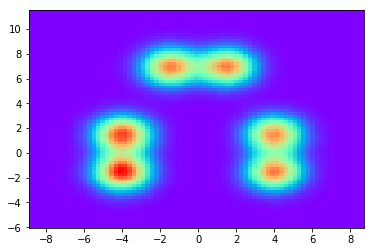

In [5]:
fig, ax = plt.subplots()
hist = ax.hist2d(Xs[:,0], Xs[:,1], bins=75)

In [6]:
cluster = pyemma.coordinates.cluster_kmeans(Xs, k=6, max_iter=50)

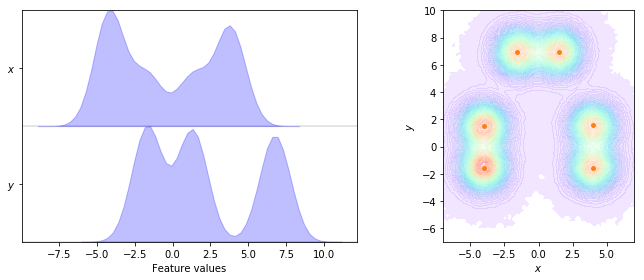

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
pyemma.plots.plot_feature_histograms(Xs, feature_labels=['$x$', '$y$'], ax=axes[0])
pyemma.plots.plot_density(*Xs.T, ax=axes[1], cbar=False, alpha=0.1)
axes[1].scatter(*cluster.clustercenters.T, s=15, c='C1')
axes[1].set_xlabel('$x$')
axes[1].set_ylabel('$y$')
axes[1].set_xlim(-7, 7)
axes[1].set_ylim(-7, 10)
axes[1].set_aspect('equal')
fig.tight_layout()

In [8]:
lags = np.arange(1, 5000, 1000)
its = pyemma.msm.its(cluster.dtrajs, lags=lags, nits=4, errors='bayes')
pyemma.plots.plot_implied_timescales(its, ylog=False);

Process ForkPoolWorker-4:
Process ForkPoolWorker-3:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/multiprocess/process.py", line 249, in _bootstrap
    self.run()
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/multiprocess/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/multiprocess/pool.py", line 119, in worker
    result = (True, func(*args, **kwds))
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/_base/estimator.py", line 138, in _estimate_param_scan_worker
    estimator.estimate(X, **params)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/msm/estimators/bayesian_msm.py", line 171, in estimate
    return super(BayesianMSM, self).estimate(dtrajs, **kw)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/msm/estimators/maximum_likelihood_msm.py", line 214, i

  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/msm/estimators/bayesian_msm.py", line 171, in estimate
    return super(BayesianMSM, self).estimate(dtrajs, **kw)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/msm/estimators/maximum_likelihood_msm.py", line 214, in estimate
    return super(_MSMEstimator, self).estimate(dtrajs, **kwargs)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/msm/estimators/maximum_likelihood_msm.py", line 214, in estimate
    return super(_MSMEstimator, self).estimate(dtrajs, **kwargs)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/_base/estimator.py", line 415, in estimate
    self._model = self._estimate(X)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/_base/estimator.py", line 415, in estimate
    self._model = self._estimate(X)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/msm/estimators/bayesian_msm.py", line 177, in _estimate
    _MLMSM._esti

KeyboardInterrupt: 

In [9]:
bayesian_msm = pyemma.msm.bayesian_markov_model(cluster.dtrajs, lag=1000, conf=0.95)
sample_mean = bayesian_msm.sample_mean('timescales', k=1)
sample_conf_l, sample_conf_r = bayesian_msm.sample_conf('timescales', k=1)
print('Mean of first ITS: {:f}'.format(sample_mean[0]))
print('Confidence interval: [{:f}, {:f}]'.format(sample_conf_l[0], sample_conf_r[0]))

msm = pyemma.msm.estimate_markov_model(cluster.dtrajs, lag=1000)
print('fraction of states used = {:f}'.format(msm.active_state_fraction))
print('fraction of counts used = {:f}'.format(msm.active_count_fraction))
print(msm.stationary_distribution)
print('sum of weights = {:f}'.format(msm.pi.sum()))

Mean of first ITS: 24812.495829
Confidence interval: [23538.852570, 25794.507200]
fraction of states used = 1.000000
fraction of counts used = 1.000000
[0.15962811 0.18497697 0.15895076 0.17851569 0.15753781 0.16039066]
sum of weights = 1.000000


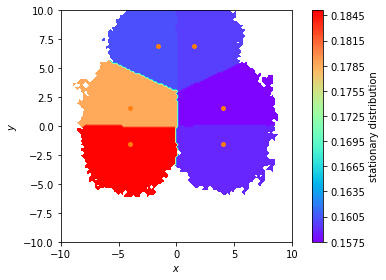

In [10]:
fig, ax, misc = pyemma.plots.plot_contour(
    *Xs.T, msm.pi[cluster.dtrajs[0]],
    cbar_label='stationary distribution',
    method='nearest', mask=True)
ax.scatter(*cluster.clustercenters.T, s=15, c='C1')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
fig.tight_layout()

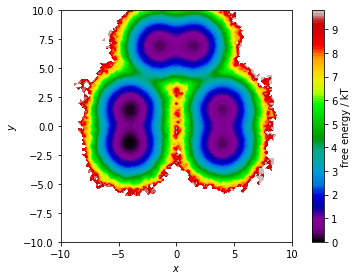

In [11]:
fig, ax, misc = pyemma.plots.plot_free_energy(
    *Xs.T,
    weights=msm.pi[cluster.dtrajs[0]],
    legacy=False)
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_aspect('equal')
fig.tight_layout()

In [12]:
eigvec = msm.eigenvectors_right()
print('first eigenvector is one: {} (min={}, max={})'.format(
    np.allclose(eigvec[:, 0], 1, atol=1e-15), eigvec[:, 0].min(), eigvec[:, 0].max()))

first eigenvector is one: True (min=0.9999999999999977, max=1.0000000000000029)


Exception in thread Thread-10:
Traceback (most recent call last):
  File "/home/psapir/anaconda3/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/psapir/anaconda3/lib/python3.6/threading.py", line 864, in run
    self._target(*self._args, **self._kwargs)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/multiprocess/pool.py", line 445, in _handle_results
    cache[job]._set(i, obj)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/multiprocess/pool.py", line 613, in _set
    self._callback(self._value)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/_base/estimator.py", line 315, in <lambda>
    callback = lambda _: progress_reporter._progress_update(1, stage='param-scan')
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/_base/progress/reporter/__init__.py", line 176, in _progress_update
    self.__check_stage_registered(stage)
  File "/home/psapir/anaconda3/lib/python3.6/site-packages/pyemma/_b

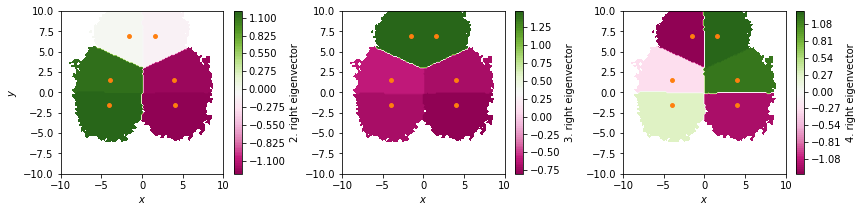

In [13]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *Xs.T, eigvec[cluster.dtrajs[0], i+1], ax=ax, cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i+2), mask=True)
    ax.scatter(*cluster.clustercenters.T, s=15, c='C1')
    ax.set_xlabel('$x$')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
axes[0].set_ylabel('$y$')
fig.tight_layout()

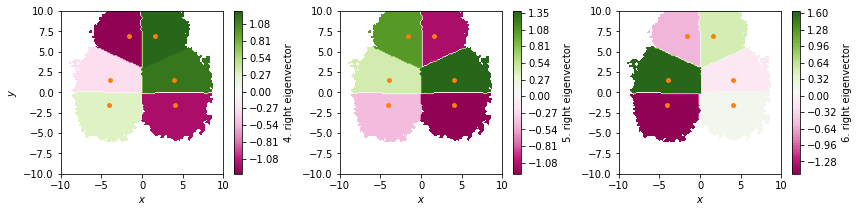

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(12, 3))
for i, ax in enumerate(axes.flat):
    pyemma.plots.plot_contour(
        *Xs.T, eigvec[cluster.dtrajs[0], i+3], ax=ax, cmap='PiYG',
        cbar_label='{}. right eigenvector'.format(i+4), mask=True)
    ax.scatter(*cluster.clustercenters.T, s=15, c='C1')
    ax.set_xlabel('$x$')
    ax.set_xlim(-10, 10)
    ax.set_ylim(-10, 10)
    ax.set_aspect('equal')
axes[0].set_ylabel('$y$')
fig.tight_layout()

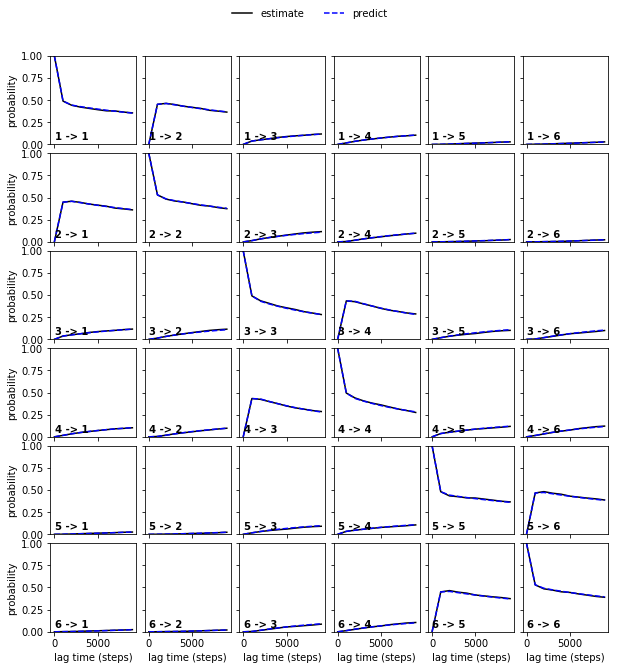

In [15]:
nstates = 6
pyemma.plots.plot_cktest(msm.cktest(nstates));